In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Dane

In [2]:

I = np.array([2470,
2050,
1520,
1300,
630,
260,
])*1e-9

U = np.array([0.034,
0.094,
0.179,
0.215,
0.353,
0.458,
])

## dopasowywanie prostej do pkt

In [3]:
def fitowanie_krzywej_rownanie_normalne(indeksy, wartosci):
    dane_z_biasem = np.c_[indeksy, np.ones((indeksy.size, 1))]
    parametry_krzywej= np.linalg.inv(dane_z_biasem.T @ dane_z_biasem) @ dane_z_biasem.T @ wartosci
    print(f"współczynnik nachylenia krzywej: {parametry_krzywej[0]} \nwspółczynnik bias: {parametry_krzywej[1]}")
    return parametry_krzywej

In [4]:

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
def fitowanie_krzywej_SGD(X, y):
    sgd_reg = SGDRegressor(max_iter = 10000, tol=0.00001, penalty=None, eta0=0.001)
    scaler =StandardScaler() 
    scaler.fit(X)
    X_new = scaler.transform(X)
    scaler.fit(y.reshape(-1,1))
    y_new = scaler.transform(y.reshape(-1,1))
    sgd_reg.fit(X_new,y_new)
    return sgd_reg.coef_, sgd_reg.intercept_

In [5]:
parametry_krzywej = fitowanie_krzywej_rownanie_normalne(U, I)

print("napięcie hamowania:", str(-parametry_krzywej[1]/parametry_krzywej[0]))

współczynnik nachylenia krzywej: -5.207834528269313e-06 
współczynnik bias: 2.528673904363833e-06
napięcie hamowania: 0.4855518912203556


In [6]:
X_new = np.array([0 , 0.6 ])
X_new_b = np.concatenate((X_new.reshape(-1,1), np.ones((2,1))), axis=1)
y_predict= X_new_b @ parametry_krzywej

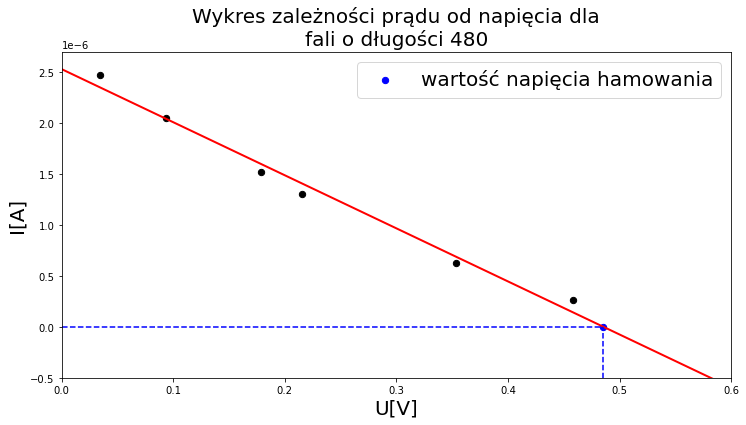

In [31]:
plt.figure(figsize=(12,6))
plt.title("Wykres zależności prądu od napięcia dla\nfali o długości 480", fontsize=20)
plt.scatter(U, I, s=40, c="k")
plt.plot(X_new, y_predict, "r", linewidth=2)
plt.plot([0,-parametry_krzywej[1]/parametry_krzywej[0]], [0,0], "b--" )
plt.plot([-parametry_krzywej[1]/parametry_krzywej[0], -parametry_krzywej[1]/parametry_krzywej[0]], [-1,0], "b--" )
plt.scatter(-parametry_krzywej[1]/parametry_krzywej[0], 0, label="wartość napięcia hamowania", s=40, c="b")
plt.axis([0, 0.6, -.5 *1e-6, 2.7*1e-6])
plt.xlabel("U[V]", fontsize=20)
plt.ylabel("I[A]", fontsize=20)
plt.legend(fontsize=20)
plt.show()